## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

## Creating Data

In [2]:
x = np.linspace(0, 50, 501)

In [3]:
y = np.sin(x)

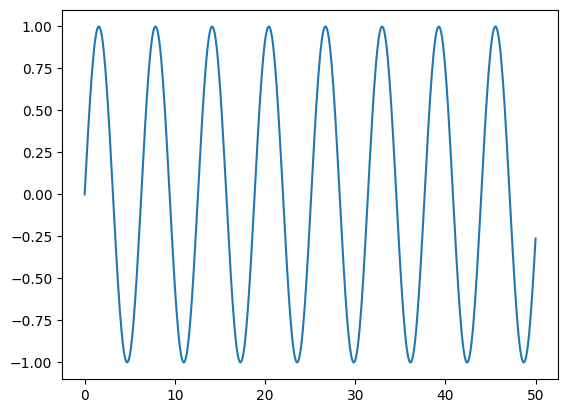

In [4]:
plt.plot(x, y)

In [5]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


## Train Test Split

In [6]:
len(df)

501

In [7]:
test_percent = 0.1

In [8]:
len(df) * test_percent

50.1

In [9]:
test_point = np.round(len(df) * test_percent)
test_point

50.0

In [10]:
test_index = int(len(df) - test_point)
test_index

451

In [11]:
train_set = df.iloc[:test_index]
test_set = df.iloc[test_index:]

In [12]:
len(test_set)

50

## Normalization

In [13]:
scaler = MinMaxScaler()

In [14]:
train_set_scaled = scaler.fit_transform(train_set)
test_set_scaled = scaler.transform(test_set)

## Creating Batches

In [15]:
length = 50
batch_size = 1

In [16]:
generator = TimeseriesGenerator(
    data=train_set_scaled,
    targets=train_set_scaled,
    length=length,
    batch_size=batch_size
)

In [17]:
len(train_set_scaled)

451

In [18]:
len(generator)

401

In [19]:
X, y = generator[0]

In [20]:
X

array([[[4.99999116e-01],
        [5.49916225e-01],
        [5.99334579e-01],
        [6.47760405e-01],
        [6.94709850e-01],
        [7.39713809e-01],
        [7.82322618e-01],
        [8.22110545e-01],
        [8.58680040e-01],
        [8.91665714e-01],
        [9.20737985e-01],
        [9.45606372e-01],
        [9.66022399e-01],
        [9.81782075e-01],
        [9.92727935e-01],
        [9.98750612e-01],
        [9.99789928e-01],
        [9.95835500e-01],
        [9.86926839e-01],
        [9.73152957e-01],
        [9.54651478e-01],
        [9.31607263e-01],
        [9.04250562e-01],
        [8.72854714e-01],
        [8.37733417e-01],
        [7.99237589e-01],
        [7.57751870e-01],
        [7.13690771e-01],
        [6.67494535e-01],
        [6.19624741e-01],
        [5.70559686e-01],
        [5.20789614e-01],
        [4.70811810e-01],
        [4.21125636e-01],
        [3.72227539e-01],
        [3.24606094e-01],
        [2.78737119e-01],
        [2.35078919e-01],
        [1.9

In [21]:
y

array([[0.02053313]])

In [22]:
train_set_scaled

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


## Creating the Model

In [23]:
num_of_features = 1

In [24]:
model = Sequential()

model.add(SimpleRNN(units=50 ,input_shape=(length, num_of_features)))
model.add(Dense(units=1))

model.compile(
    optimizer='adam',
    loss='mse'
)

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [26]:
model.fit(
    generator,
    epochs=5
)

Epoch 1/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1296
Epoch 2/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3289e-04
Epoch 3/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6987e-04
Epoch 4/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4269e-04
Epoch 5/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8574e-04


<Axes: >

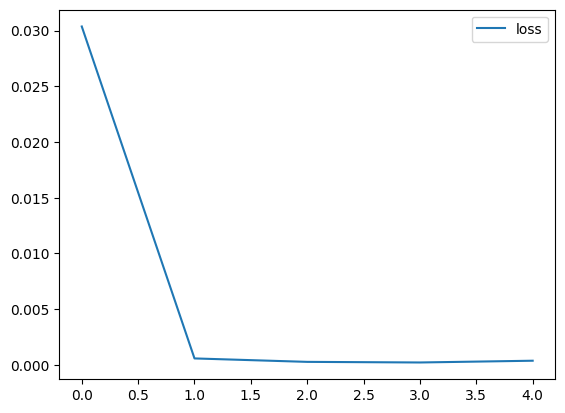

In [27]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluation on Test Data

In [28]:
first_eval_batch = train_set_scaled[-length:]
first_eval_batch = first_eval_batch.reshape((1, length, num_of_features))

In [29]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[0.97095793]], dtype=float32)

In [30]:
test_set_scaled[0]

array([0.94955134])

In [31]:
test_predictions = []

first_eval_batch = train_set_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, num_of_features))

In [32]:
# first_eval_batch.reshape((1, length, num_of_features))

In [33]:
# predicted_value = [[99]]
# np.append(current_batch[:,1:,:], [[[99]]], axis=1)

In [34]:
for i in range(len(test_set)):
    current_prediction = model.predict(current_batch)[0]
    test_predictions.append(current_prediction)
    current_batch = np.append(current_batch[:,1:,:], [[current_prediction]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

In [35]:
test_predictions

[array([0.97095793], dtype=float32),
 array([0.97882414], dtype=float32),
 array([0.9971033], dtype=float32),
 array([0.99619496], dtype=float32),
 array([1.0122079], dtype=float32),
 array([0.99987984], dtype=float32),
 array([0.9999857], dtype=float32),
 array([0.98031384], dtype=float32),
 array([0.96575296], dtype=float32),
 array([0.9422873], dtype=float32),
 array([0.9162722], dtype=float32),
 array([0.8874718], dtype=float32),
 array([0.84892505], dtype=float32),
 array([0.81593853], dtype=float32),
 array([0.7702978], dtype=float32),
 array([0.7270474], dtype=float32),
 array([0.68676925], dtype=float32),
 array([0.63643646], dtype=float32),
 array([0.594482], dtype=float32),
 array([0.5343362], dtype=float32),
 array([0.49802622], dtype=float32),
 array([0.43351582], dtype=float32),
 array([0.39807966], dtype=float32),
 array([0.3349437], dtype=float32),
 array([0.29761788], dtype=float32),
 array([0.23681015], dtype=float32),
 array([0.19842231], dtype=float32),
 array([0.148

In [36]:
test_set_scaled

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [37]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[ 0.94191008],
       [ 0.95764236],
       [ 0.99420034],
       [ 0.99238372],
       [ 1.02440928],
       [ 0.99975342],
       [ 0.99996513],
       [ 0.96062173],
       [ 0.93150021],
       [ 0.88456932],
       [ 0.83253953],
       [ 0.77493914],
       [ 0.69784628],
       [ 0.63187376],
       [ 0.54059308],
       [ 0.45409289],
       [ 0.37353726],
       [ 0.2728725 ],
       [ 0.18896426],
       [ 0.06867364],
       [-0.00394576],
       [-0.13296553],
       [-0.20383727],
       [-0.33010816],
       [-0.40475922],
       [-0.52637371],
       [-0.60314877],
       [-0.70338602],
       [-0.78317582],
       [-0.85971633],
       [-0.93081744],
       [-0.99235741],
       [-1.04316346],
       [-1.0871739 ],
       [-1.09926124],
       [-1.14325421],
       [-1.10766475],
       [-1.15299863],
       [-1.07437931],
       [-1.11545256],
       [-0.993089  ],
       [-1.02918136],
       [-0.88346349],
       [-0.89203489],
       [-0.7371842 ],
       [-0

In [38]:
test_set['Predictions'] = true_predictions
test_set.head()

,Sine,Predictions
45.1,0.899097,0.941910
45.2,0.938307,0.957642
45.3,0.968142,0.994200
45.4,0.988304,0.992384
45.5,0.998591,1.024409


<Axes: >

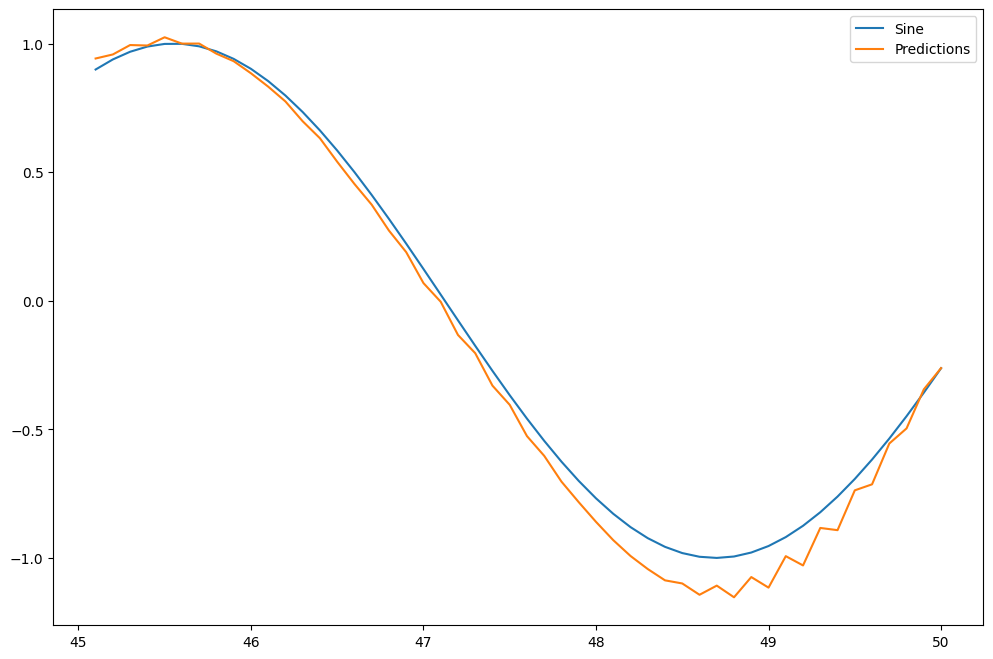

In [39]:
test_set.plot(figsize=(12,8))

## Creating LSTM Model

In [40]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2
)

In [41]:
length = 49
batch_size = 1

In [42]:
generator = TimeseriesGenerator(
    data=train_set_scaled,
    targets=train_set_scaled,
    length=length,
    batch_size=batch_size
)

validation_generator = TimeseriesGenerator(
    data=test_set_scaled,
    targets=test_set_scaled,
    length=length,
    batch_size=batch_size
)

In [43]:
num_of_features = 1

In [44]:
model = Sequential()

model.add(LSTM(units=50 ,input_shape=(length, num_of_features)))
model.add(Dense(units=1))

model.compile(
    optimizer='adam',
    loss='mse'
)

In [45]:
model.fit(
    generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0291 - val_loss: 1.7353e-04
Epoch 2/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.5593e-04 - val_loss: 6.0164e-04
Epoch 3/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0020 - val_loss: 1.4015e-04
Epoch 4/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.6081e-05 - val_loss: 1.6819e-06
Epoch 5/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.2160e-05 - val_loss: 3.1589e-06
Epoch 6/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.0048e-05 - val_loss: 4.4022e-06


In [46]:
test_predictions = []

first_eval_batch = train_set_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, num_of_features))

for i in range(len(test_set)):
    current_prediction = model.predict(current_batch)[0]
    test_predictions.append(current_prediction)
    current_batch = np.append(current_batch[:,1:,:], [[current_prediction]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

<Axes: >

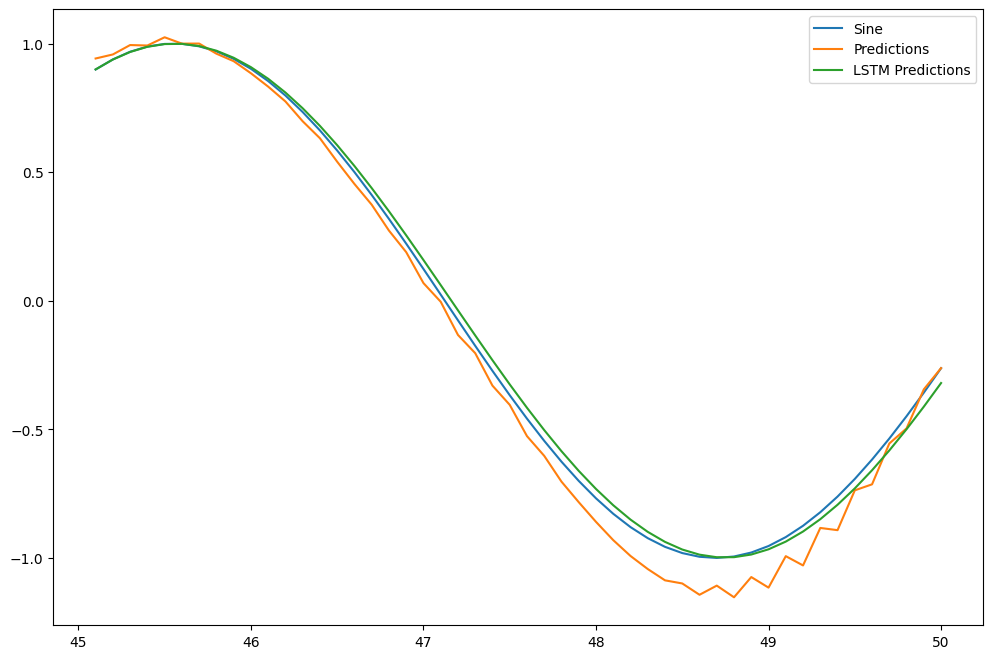

In [47]:
true_predictions = scaler.inverse_transform(test_predictions)
test_set['LSTM Predictions'] = true_predictions
test_set.plot(figsize=(12,8))

## Forecasting into Future

In [48]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [49]:
generator = TimeseriesGenerator(
    data=scaled_full_data,
    targets=scaled_full_data,
    length=length,
    batch_size=batch_size
)

In [50]:
model = Sequential()

model.add(LSTM(units=50 ,input_shape=(length, num_of_features)))
model.add(Dense(units=1))

model.compile(
    optimizer='adam',
    loss='mse'
)

In [51]:
model.fit(
    generator,
    epochs=6,
)

Epoch 1/6
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0752
Epoch 2/6
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8.2814e-05
Epoch 3/6
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.2058e-05
Epoch 4/6
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.0841e-05
Epoch 5/6
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.2436e-04
Epoch 6/6
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4.3836e-05


In [52]:
forecast = []

first_eval_batch = train_set_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, num_of_features))

for i in range(25):
    current_prediction = model.predict(current_batch)[0]
    forecast.append(current_prediction)
    current_batch = np.append(current_batch[:,1:,:], [[current_prediction]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [53]:
forecast = full_scaler.inverse_transform(forecast)
forecast

array([[ 0.89475603],
       [ 0.93189753],
       [ 0.95890346],
       [ 0.97553708],
       [ 0.98163685],
       [ 0.97716237],
       [ 0.96219361],
       [ 0.93692383],
       [ 0.90165128],
       [ 0.85676827],
       [ 0.80275271],
       [ 0.74015737],
       [ 0.6696057 ],
       [ 0.59178769],
       [ 0.50745793],
       [ 0.41743597],
       [ 0.32260276],
       [ 0.22389862],
       [ 0.12231739],
       [ 0.01889796],
       [-0.08528917],
       [-0.18915676],
       [-0.29161752],
       [-0.39160076],
       [-0.48806695]])

In [54]:
25 * 0.1

2.5

In [55]:
forecast_index = np.arange(50.1, 52.6, step=0.1)

In [56]:
len(forecast_index)

25

In [57]:
len(forecast)

25

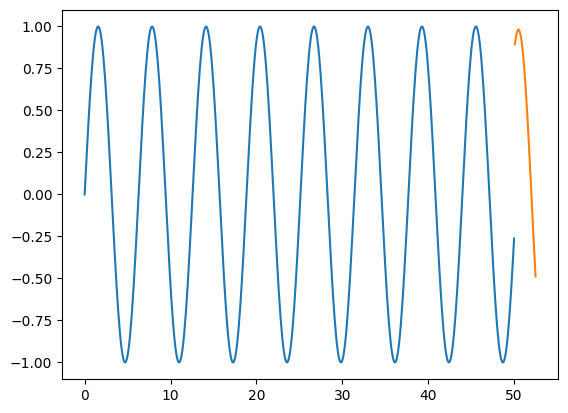

In [58]:
plt.plot(df.index, df['Sine'])
plt.plot(forecast_index, forecast)